In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
file_path = '/Users/hamidahmad/Desktop/dataset.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Display the first few rows to understand the data structure
print(data.head())

                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review sentiment  
0  review mentioned watching z episode hooked rig...  positive  
1  wonderful little production filling technique ...  positive  
2  thought wonderful way spend time hot summer we...  positive  
3  basically family little boy take think combine...  negative  
4  letter matter love time money usually stunning...  positive  


In [3]:
# Encode the sentiment column: "positive" -> 1, "negative" -> 0
label_encoder = LabelEncoder()
data['sentiment_encoded'] = label_encoder.fit_transform(data['sentiment'])


In [4]:
X = data['cleaned_review']  # Use the cleaned review column
y = data['sentiment_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 39665
Test set size: 9917


In [5]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [6]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)


RandomForestClassifier(random_state=42)

In [7]:
# Predict on the test set
y_pred = rf_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print detailed classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.84
              precision    recall  f1-score   support

    negative       0.84      0.84      0.84      4939
    positive       0.84      0.84      0.84      4978

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917



Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.84      0.84      4939
    positive       0.84      0.84      0.84      4978

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917



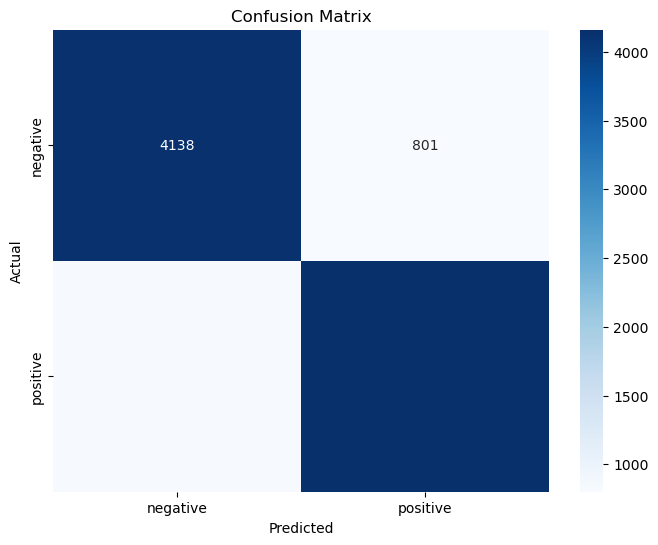

In [8]:
# Predict on the test set
y_pred = rf_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


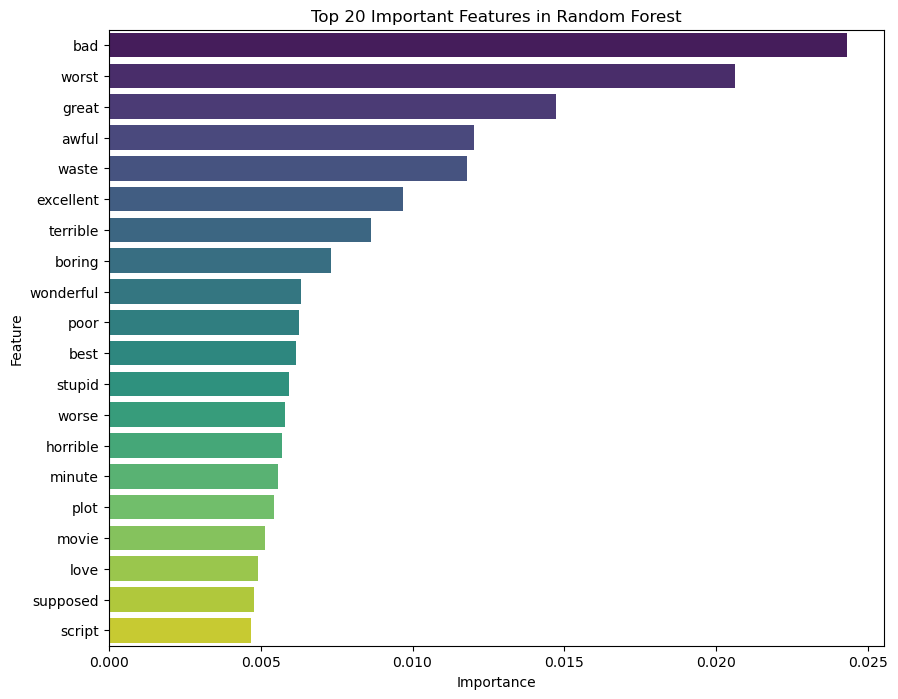

In [10]:
# Get feature importances from the model
feature_importances = rf_model.feature_importances_
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame of feature importances
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
importance_df = importance_df.sort_values(by='importance', ascending=False).head(20)

# Plot top 20 important features
plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x='importance', y='feature', palette="viridis")
plt.title("Top 20 Important Features in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
